# 1.2d Geometric random walk

# importing shit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import scipy

# defining geometric random walk function

In [3]:
μ = 0
σ = 0.2
N = 100

def GRW(μ, σ, N):
    X = np.random.randn(N)*σ + μ
    Y = np.cumsum(X)
    Z = np.exp(Y)
    return Z



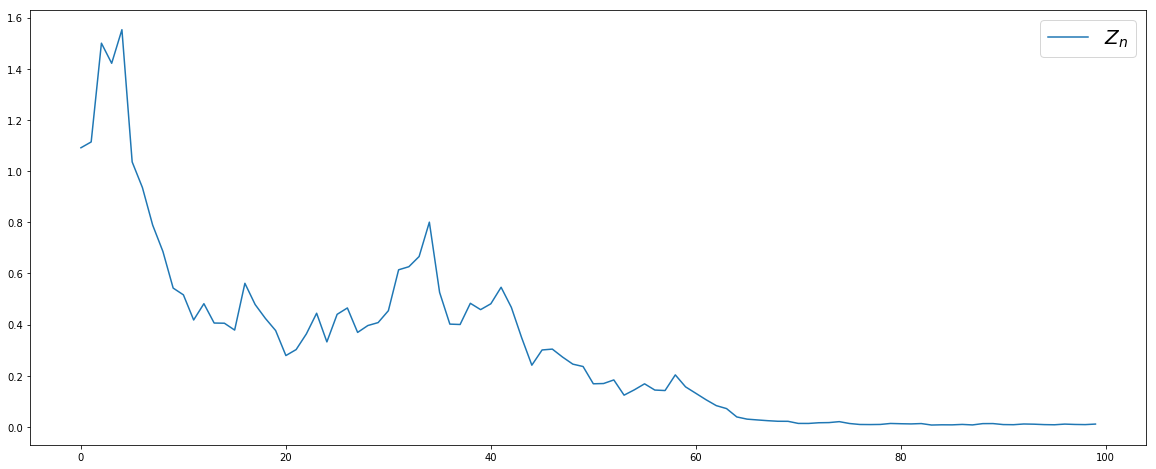

In [4]:
plt.figure(figsize = (20, 8))
plt.plot(range(N), GRW(0, 0.2, 100), label = r'$Z_n$')
plt.legend(fontsize = 20)

# calculating empirical average

In [5]:
def empav(realisations, μ, σ, N):
    raw = np.zeros(shape = (N, realisations))
    for i in range(realisations):
        raw[:, i] = GRW(μ, σ, N)
    averages = np.zeros(N)
    for i in range(N):
        averages[i] = (1/realisations)*np.sum(raw[i, :])
    deviation = np.std(raw, axis = 1)
    return [raw, averages, deviation]

# plotting empirical averages as a function of time n

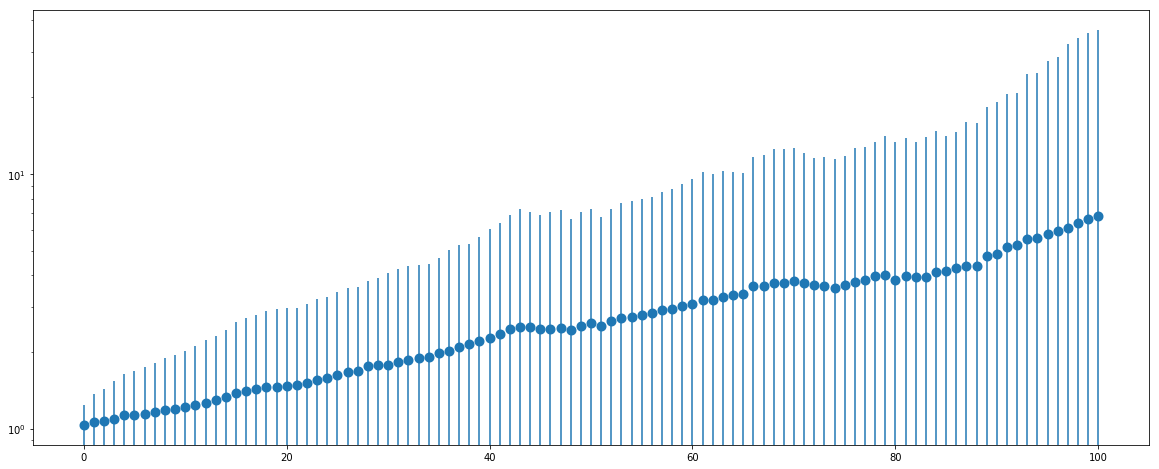

In [7]:
realisations = 500
μ = 0
σ = 0.2
N = 101
raw, empaverages, deviation = empav(realisations, μ, σ, N)
plt.figure(figsize = (20, 8))
plt.errorbar(range(N), y = empaverages, yerr = deviation, fmt = 'o', mew = 4)
plt.yscale("log")

# theoretical pdf

In [31]:
def pdfz(μ, σ, n, spaces):
    zs = np.linspace(-1, n, spaces)
#     print(zs)
    thepdf = np.zeros(len(zs))
    thepdf = [(np.exp(-(np.log(i)-n*μ)**2/(2*n*σ*σ)))/(i * σ * np.sqrt(2*n*np.pi)) for i in zs]
    return [zs, thepdf]


# at time n = 10
# produce box plot

(0, 5)

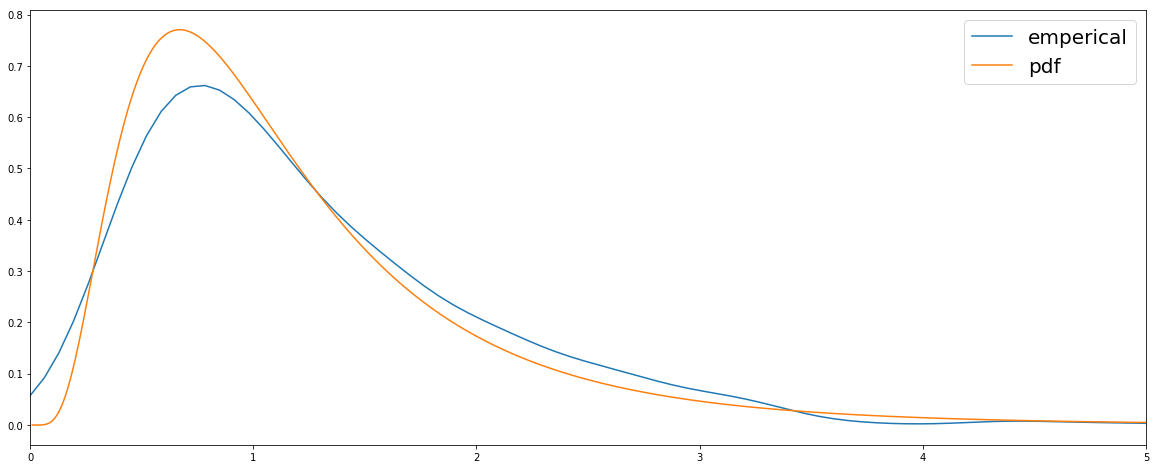

In [22]:
μ = 0
σ = 0.2
n = 10
spaces = 1000
realisations = 500
raw_10, empaverages_10, deviation_10 = empav(realisations, μ, σ, n)
data_10 = raw_10[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_10, label = "emperical")
zs_10, thepdf_10 = pdfz(μ, σ, n, spaces)
plt.plot(zs_10, thepdf_10, label = "pdf")
plt.legend(fontsize = 20)
plt.xlim([0, 5])

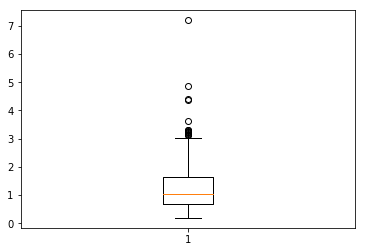

In [23]:
plt.boxplot(data_10);

# at time n = 100
# produce box plot

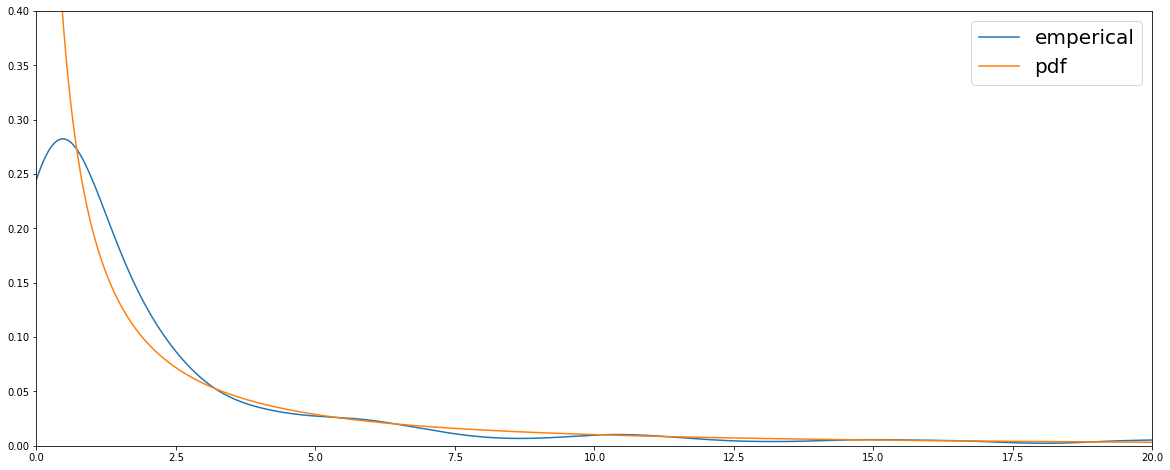

In [37]:
μ = 0
σ = 0.2
n = 100
spaces = 10000
realisations = 500
raw_100, empaverages_100, deviation_100 = empav(realisations, μ, σ, n)
data_100 = raw_100[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_100, label = "emperical", gridsize = 1000000)
zs_100, thepdf_100 = pdfz(μ, σ, n, spaces)
plt.plot(zs_100, thepdf_100, label = "pdf")
plt.xlim([0, 20])
plt.ylim([0, 0.4])
plt.legend(fontsize = 20)
# plt.yscale("log")

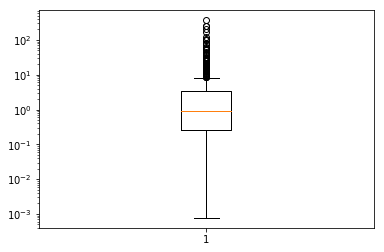

In [12]:
plt.boxplot(data_100)
plt.yscale("log")

# maybe do a local one to show the fluctuations 

# ergodic average for single realisation

In [13]:
μ = 0
σ = 0.2
N = 100

def ergav(μ, σ, N):
    ergaverages = np.zeros(N)
    ergcumsum = np.cumsum(GRW(μ, σ, N))
    for i in range(0, 100):
        ergaverages[i] = ergcumsum[i] / (i+1)
#     return ergaverages
    plt.figure(figsize = (20, 8))
    plt.plot(ergaverages, label = 'Ergodic average up to N =100')
    plt.legend(fontsize = 20)
    

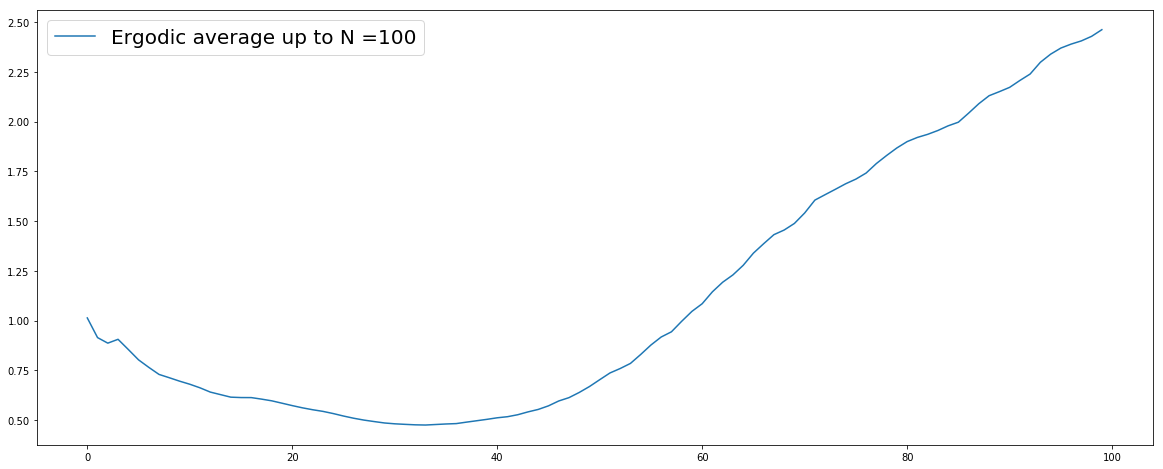

In [14]:
ergav(0, 0.2, 100)

# 1.2e

# function for plotting empirical tail

In [15]:
def emptail(σ, μ, n, realisations):
    raw = np.zeros(realisations)
    for i in range(realisations):
        raw[i] = GRW(μ, σ, n)[n-1]
    x = np.sort(raw)
    y = np.arange(1, len(x)+1) / len(x)
    return [x, y]

# function for generating cdf and theoretical tail

In [80]:
def thecdf(μ, σ, n, spaces):
    zs = np.linspace(0, n, spaces)
    thecdf = np.zeros(len(zs))
    thecdf = np.asarray([1/2 + (1/2) * scipy.special.erf((np.log(i)-n*μ) / (np.sqrt(2*n)*σ)) for i in zs])
    return [zs, thecdf]

In [83]:
def thetail(μ, σ, n, spaces):
    zs, a = thecdf(μ, σ, n, spaces)
    thetail = 1 - a
    return [zs, thetail]

# empirical tail for n = 10

(0.1, 10)

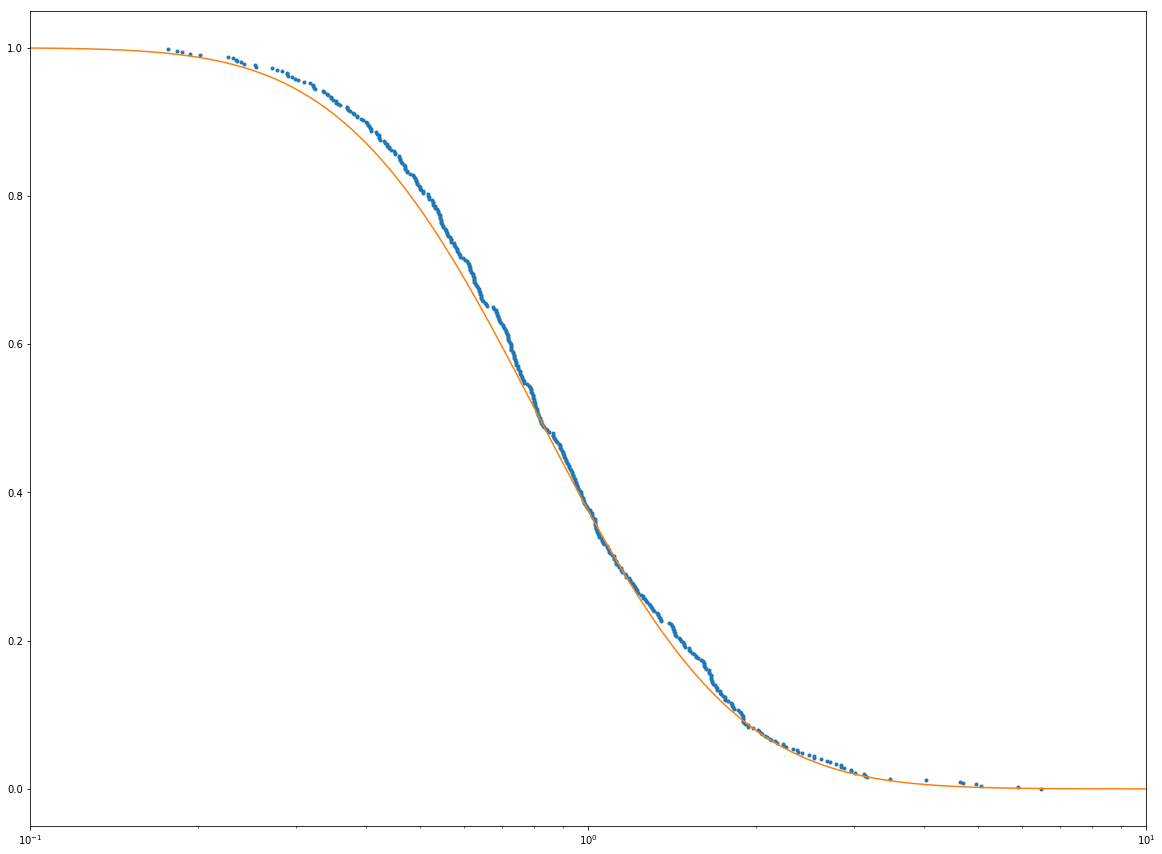

In [92]:
σ = 0.2
μ = -0.02
n = 10
realisations = 500
steps = 10000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

plt.figure(figsize = (20, 15))
plt.plot(empx, 1-empy, marker = '.', linestyle = 'none')
plt.plot(thex, they)
plt.xscale("log")
plt.xlim([10**-1, 10])

# empirical tail for n = 100

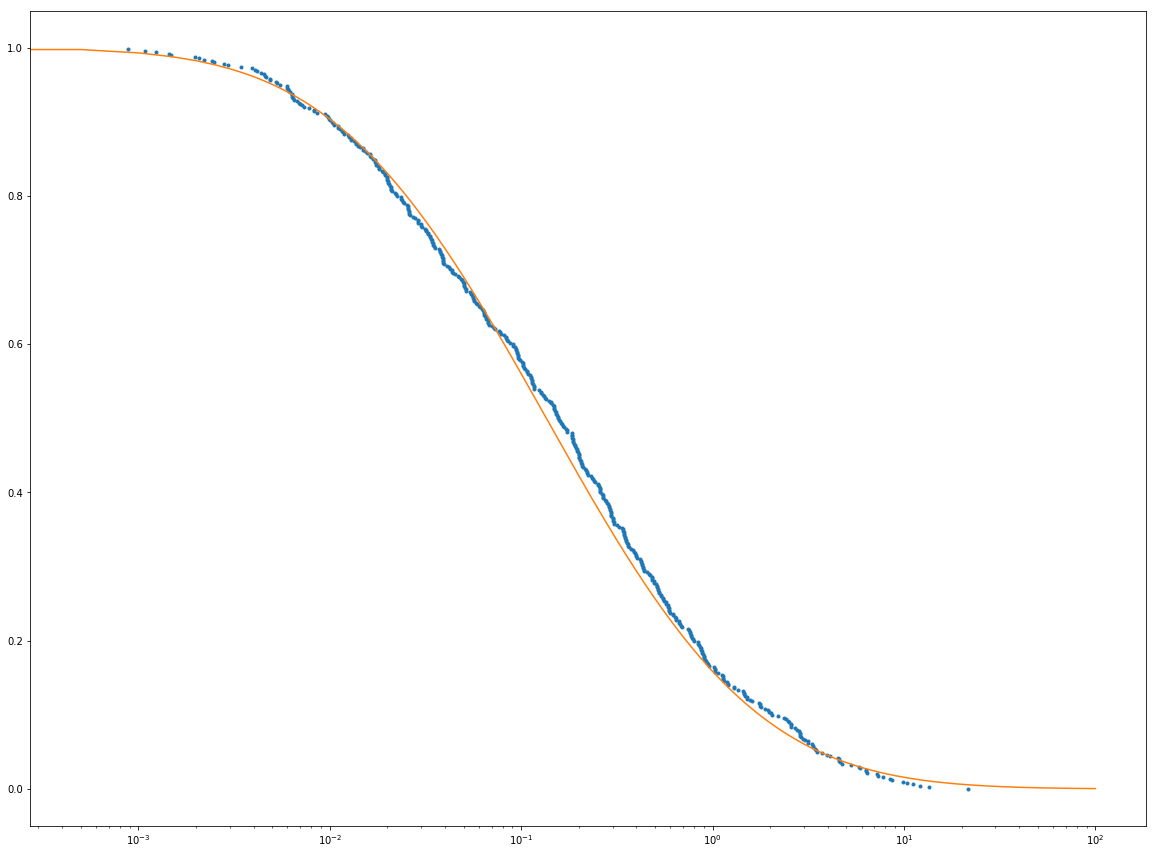

In [96]:
σ = 0.2
μ = -0.02
n = 100
realisations = 500
steps = 200000

empx, empy = emptail(σ, μ, n, realisations)
thex, they = thetail(μ, σ, n, steps)

plt.figure(figsize = (20, 15))
plt.plot(empx, 1-empy, marker = '.', linestyle = 'none')
plt.plot(thex, they)
plt.xscale("log")
# plt.xlim([10**-1, 10])